# playground


Import the necessary stuff:

In [1]:
%load_ext autoreload
%autoreload 2

import os

SELECTED_DEVICE = 2
print(f'Setting CUDA visible devices to [{SELECTED_DEVICE}]')
os.environ['CUDA_VISIBLE_DEVICES'] = f'{SELECTED_DEVICE}'

Setting CUDA visible devices to [2]


In [3]:
import matplotlib.pyplot as plt

import jax
import jax.random as jrnd
import jax.numpy as jnp
import distrax as dx
import jaxkern as jk

from jax.config import config
jax.config.update("jax_enable_x64", True)  # crucial for Gaussian processes

from tensorflow_probability.substrates import jax as tfp
tfd = tfp.distributions
tfb = tfp.bijectors

import os
import sys
sys.path.append(os.path.expanduser('~/Documents/Repos/bayesianmodels'))

---

In [23]:
kernel = jk.RBF()
params = dict(
        lengthscale=jnp.ones((1))*0.001, 
        variance=jnp.ones((1)))

In [17]:
x = jnp.linspace(-1, 1, 1_000)

1.0


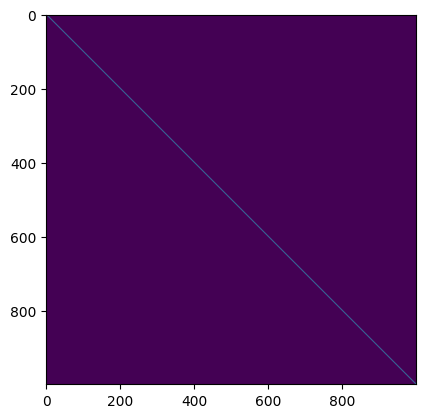

: 

In [25]:
cov = kernel.cross_covariance(
        params=params,
        x=x, y=x)
print(cov[0,0])
plt.imshow(cov)

In [7]:
def fun(in1, in2):
    cov = kernel.cross_covariance(
        params=params,
        x=in1, y=in2)
    return jnp.diag(cov).shape

jit_fn = jax.jit(fun)
jit_fn(x, x)

%timeit -n1000 jit_fn(x, x)


22.2 µs ± 667 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [8]:
xs = x[:, jnp.newaxis]

cov_fn = lambda x: kernel.cross_covariance(
    params=params,
    x=x, y=x)

jit_fn = jax.jit(jax.vmap(cov_fn))
jit_fn(x=xs)[:,0,0]

%timeit -n1000 jit_fn(x=xs)[:,0,0]


600 µs ± 20.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [19]:
xs = x[:, jnp.newaxis]

def cov_fn(x):
    return kernel.cross_covariance(
    params=params,
    x=x, y=x)

fn = jax.vmap(cov_fn)
fn(xs)

%timeit fn(xs)

kernel.diagonal


9.65 ms ± 99.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [13]:
tfk = tfp.math.psd_kernels
kernel = tfk.ExponentiatedQuadratic(1, 0.5)

kernel.apply(x,x)

Array(1., dtype=float64)